## Part A

## Introduction

### Is head size related to brain weight in healthy adult humans?

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characteristics such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

(Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.)

Use the above information to complete Tasks 1 - 13

**Task 1** - Load the data

In [39]:
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/Brainhead.csv'

df = pd.read_csv(data_url)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [40]:
df.shape

(237, 4)

In [41]:
df.describe()

,Gender,Age,Head,Brain
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


**Task 2**

The two variables we are interested in - for now - are

* `Brain` - the brain weight in g
* `Head` - the head size in cubic cm

If we wish to predict brain weight from head size, which variable is the **independent variable** (also called the feature, explanatory, or x variable) and which variable is the **dependent variable** (also called the target, response or y variable)?

In [42]:
df.head(1)

,Gender,Age,Head,Brain
0,1,1,4512,1530


In [43]:
ind_x = df['Head']
dep_y = df['Brain']

In [44]:
ind_x.head(1)

0    4512
Name: Head, dtype: int64

In [45]:
dep_y.head(1)

0    1530
Name: Brain, dtype: int64

**Task 3** - Create a plot

This task will not be autograded - but it is part of the project!

Create a scatterplot showing the relationship between brain weight and head size.  Make sure to plot the correct variable on the correct axis and label your axes.

* Import your plotting library
* Plot your x- and y-variables on a scatter plot
* Label the axes
* Give your plot a title!

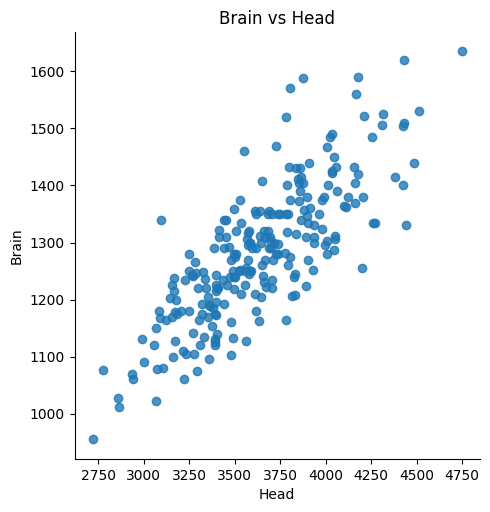

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(data=df,x='Head',y='Brain',ci=None,fit_reg=False)
plt.xlabel('Head')
plt.ylabel('Brain')
plt.title('Brain vs Head')
plt.show()

**Task 4** Describe your plot

Select the correct description of the strength and direction of the relationship between the independent and dependent variables shown in the plot you created in Task 3.

A: There appears to be a negative linear relationship between the independent and dependent variables.

B: There appears to be a non-linear relationship between the independent and dependent variables.

C: There appears to be no linear relationship between the independent and dependent variables.

D: There appears to be a positive linear relationship between the independent and dependent variables.


In [47]:
Answer = 'D'

**Task 5** - Missing data

Now, let's determine if there is any missing data in the dataset. If there are null values, drop the row that contains a missing value(s).

In [48]:
df.isnull().sum().sum()

0

**Task 6** - Correlation coefficient

Now that we've explored our data through a plot and checked for null values, we can move on to some calculations. First, we're going to calculate and interpret the correlation coefficient for the relationship between *head size* and *brain weight*.

* Import import scipy.stats as st
* Calculate the correlation coefficient and assign it to the variable `r`. Remember that the output of `st.pearsonr()` is *two* values, the correlation and the p-value for the correlation.

In [49]:
import scipy.stats as st

In [50]:
from scipy.stats import t

In [51]:
r,p_val=st.pearsonr(df['Head'],df['Brain'])
print('Correlation Coefficient = ',r)

Correlation Coefficient =  0.7995697092542963


**Task 6** - Correlation coefficient written answer

Comment on the correlation coefficient value: Does the value align with your above plot? Is it a strong correlation or a weak correlation? In what direction? Your answer is not autograded but it is required for a complete project.

ANSWER HERE : Yes, the graph suggested very heavily that there was a positive linear relation, and the scipy also tallied that number around 0.8.

**Task 7** - Correlation coefficient, part 2

**Without** doing any other calculations, determine the correlation of *brain weight* with *head size*.

In [52]:
r_2 = 0.7995
print('Correlation Coefficient,part 2 =',r_2)

Correlation Coefficient,part 2 = 0.7995


**Task 8** - Linear model

Now that we've calculated the correlation coefficient, we going to fit a linear model to our two variables. We'll use the `statsmodels` to calculate the least-squares regression coefficients (slope and intercept). Our two variables are head size (`Head`) and brain weight (`Brain`).


In [53]:
from statsmodels.formula.api import ols

In [54]:
equation = 'Brain~Head'
model = ols(equation,data=df).fit()
slope = model.params[1]
intercept = model.params[0]

In [55]:
print('The Slope is',slope)
print('The intercept is',intercept)

The Slope is 0.2634293394893992
The intercept is 325.573421049442


**Task 9** Writing the linear equation

Select the statement.

A: $\hat{Y} = 0.26 + 325.57x$

B: $\hat{Y} = 0.26 - 325.57x$

C: $\hat{Y} = 325.57 + 0.26x$

D: $\hat{Y} = 325.57 - 0.26x$


In [56]:
Answer = 'C'

**Task  10** - Interpreting the equation

Answer the following questions about the slope and intercept parameters.

10a - What does the slope term tell us about the relationship between head size and brain weight? Make sure to include the units of the variables in your answer!

10b - What does the intercept tell us about the relationship between head size and brain weight? *Hint: Think about what a negative intercept means in terms of weight and size - can you have a negative weight?*

ANSWER = 10a = For every change in the x(head), the brain is going to change by 0.26

10b = When the head size is zero , the brain size is equal to the intercept(i.e 325.57)

**Task 10** Interpreting the equation

Select the statement that correctly interprets the slope and intercept coefficients.

A: The slope tells us that, for every additional cubic cm of head size, we expect brain weight to increase by .26g.  It does not make sense to interpret the intercept because 0 is **NOT** one of the x-values in our dataset.

B: The slope tells us that, for every additional g of brain weight, we expect head size to increase by .26g.  It does not make sense to interpret the intercept because 0 is one of the x-values in our dataset.

C: The slope tells us that, for every additional cubic cm of head size, we expect brain weight to increase by 325.57g.  It does not make sense to interpret the intercept because 0 is one of the x-values in our dataset.

D: The intercept tells us that, for every additional cubic cm of head size, we expect brain weight to increase by .26g.  It does not make sense to interpret the slope because 0 is one of the x-values in our dataset.


In [57]:
Answer = 'A'

**Task 11** - Scatterplot with regression line

Create a scatterplot with the regression line overlayed on top of the data. You can do this either with the seaborn plotting library or with matplotlib.

**Tips**

* If you use seaborn, turn off the confidence interval plotting (`ci=None`).
* If you use matplotlib, you'll have to generate the data for the line using the equation you wrote in Task 9

Write your plotting code below.

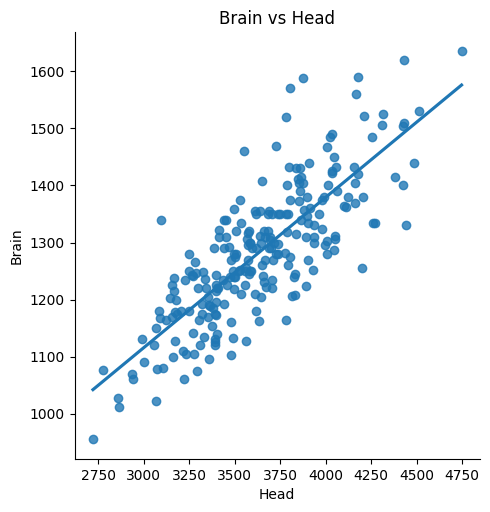

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(data=df,x='Head',y='Brain',ci=None,fit_reg=True)
plt.xlabel('Head')
plt.ylabel('Brain')
plt.title('Brain vs Head')
plt.show()

**Task 12** - Making a prediction

We're going to use our model to make a prediction. A healthy human has a brain size of 4100 cubic cm. How much do we expect his or her brain to weigh?



In [59]:
x_healthy = 4100

predict_healthy = slope*x_healthy + intercept
print('Prediction for a brain size of 4100 ccm',predict_healthy)

Prediction for a brain size of 4100 ccm 1405.6337129559786


**Task 13** - Calculating a residual

Now that we've made a prediction, we can take a look at a *model residual*. For this task, you will calculate and interpret the model residual for the first observation in the dataset. Remember that the first observation in the dataset is `Head`=4512 cubic centimeters.

In [60]:
x_first = 4512
observed_first = df['Brain'][0]
predict_first = slope*x_first + intercept
residual = observed_first - predict_first
print('Residual for the prediction',residual)

Residual for the prediction 15.833399174388887


## Part B

### Sleep Data

Use the following information to answer Tasks 14 - 16 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below.

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

In [61]:
data_url_2 = 'https://raw.githubusercontent.com/pixeltests/datasets/main/Sleep.csv'
df1 = pd.read_csv(data_url_2)
df1.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Task 15**

Write a function that replaces the `_` character in each animal name with a space.  For example,  Asian_elephant = Asian elephant.

In [65]:
test =  'Asian_elephant'
test.replace('_',' ')

'Asian elephant'

In [76]:
def name_nospace(x):
   return x.replace('_',' ')
name_nospace('Asian_')

df1['Animal_name'] = df1['Animal'].apply(name_nospace)

In [77]:
df1.head(1)

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Animal_name
0,African_giant_pouched_rat,1.0,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,African giant pouched rat


**Task 16** - Correlation calculations

On this final graded task, we're going to complete two more correlation calculations.

* Calculate the correlation between life expectancy and total sleep.
* Calculate the correlation between gestation time and total sleep.

In [90]:
corr_life_sleep = np.corrcoef(df1['Life'],df1['Totsleep'])[0,1]
print('Correlation between Total Sleep and Life expectency =',corr_life_sleep)

Correlation between Total Sleep and Life expectency = -0.3824461769490717


In [91]:
corr_gest_sleep = np.corrcoef(df1['Totsleep'],df1['Gest'])[0,1]
print('Correlation between Total Sleep and Gestation time =',corr_gest_sleep)

Correlation between Total Sleep and Gestation time = -0.6144743061371065
